# Bank Campaing project. 

### Variable explaination:

The dataset has the following attributes:

* age (numeric)
* job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
* marital : marital status (categorical: "married","divorced","single"; note: "divorced" meansdivorced or widowed)
* education (categorical: "unknown","secondary","primary","tertiary")
* default: has credit in default? (binary: "yes","no")
* balance: average yearly balance, in euros (numeric)
* housing: has housing loan? (binary: "yes","no")
* loan: has personal loan? (binary: "yes","no")
* contact: contact communication type (categorical: "unknown","telephone","cellular")
* day: last contact day of the month (numeric)
* month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* duration: last contact duration, in seconds (numeric)
* campaign: number of contacts performed during this campaign and for this client (numeric,includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previouscampaign (numeric, -1 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical:"unknown","other","failure","success")

Lets Begain with the relative questions:

* 1: What is the goal of the bank campaign, and how does it relate to the target variable "deposit"?
* 2: What are the demographic characteristics of the customers in the dataset (age, job, marital status, education)?
* 3: How do the customers' account balances and other financial information (default, balance, loan, housing) relate to their likelihood of making a deposit?
* 4: What time of year and day of the week is the bank most successful in reaching customers?
* 5: How do the duration and frequency of contact (duration, campaign) affect the customers' decision to make a deposit?
* 6: Have the customers been contacted by the bank before (pdays, previous), and does this affect their likelihood of making a deposit?
* 7: What was the outcome of previous bank campaigns (poutcome), and how does it relate to the current campaign's success?


## 0.0: Import the libraries

In [542]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import sklearn
from scipy import stats


from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor


import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)


## 1. Data Exploration:

In [543]:
# Read the data 
df = pd.read_csv('bank.csv')

In [544]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [546]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [547]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,11162.0,NaN,NaN,NaN,41.231948,11.913369,18.0,32.0,39.0,49.0,95.0
job,11162,12,management,2566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,11162,3,married,6351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,11162,4,secondary,5476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,11162,2,no,10994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,11162.0,NaN,NaN,NaN,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.0,81204.0
housing,11162,2,no,5881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,11162,2,no,9702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,11162,3,cellular,8042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,11162.0,NaN,NaN,NaN,15.658036,8.42074,1.0,8.0,15.0,22.0,31.0


In [548]:
df.shape

(11162, 17)

In [549]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [550]:
df.duplicated().sum()

0

Data Exploration first insighs: As we can see, there aren't duplicates or missing values in the dataset. 

In [551]:
# we are separating the categorical columns in two groups, numerical and categorical.
numeric_col = df.select_dtypes(include=['int64', 'float64']).columns
category_col = df.select_dtypes(include=['object']).columns

# Now we focus on the categorical columns to explore its variables.
for col in category_col:
    print(col, "(", len(df[col].unique()), "values):")
    print(df[col].unique())
    print(df[col].value_counts(normalize=True))
    print("\n")

job ( 12 values):
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
job
management       0.229887
blue-collar      0.174162
technician       0.163322
admin.           0.119513
services         0.082691
retired          0.069701
self-employed    0.036284
student          0.032252
unemployed       0.031984
entrepreneur     0.029385
housemaid        0.024548
unknown          0.006271
Name: proportion, dtype: float64


marital ( 3 values):
['married' 'single' 'divorced']
marital
married     0.568984
single      0.315176
divorced    0.115839
Name: proportion, dtype: float64


education ( 4 values):
['secondary' 'tertiary' 'primary' 'unknown']
education
secondary    0.490593
tertiary     0.330496
primary      0.134385
unknown      0.044526
Name: proportion, dtype: float64


default ( 2 values):
['no' 'yes']
default
no     0.984949
yes    0.015051
Name: proportion, dtype: float64


housing ( 2 

## 2. EDA: 

* 1: What is the goal of the bank campaign, and how does it relate to the target variable "deposit"?

deposit
no     0.52616
yes    0.47384
Name: count, dtype: float64


<Axes: xlabel='deposit', ylabel='count'>

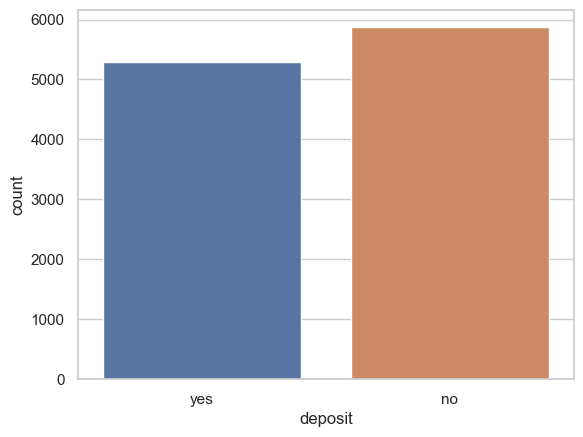

In [552]:
print(df['deposit'].value_counts()/df.shape[0])
sns.countplot(x='deposit', data=df)

**Insight:**
We can see that the goal of the bank campaing is to encourage clients to manke a deposit, so the deposit variable is our target variable that we want to predict.

### 2.: What are the demographic characteristics of the customers in the dataset (age, job, marital status, education)?


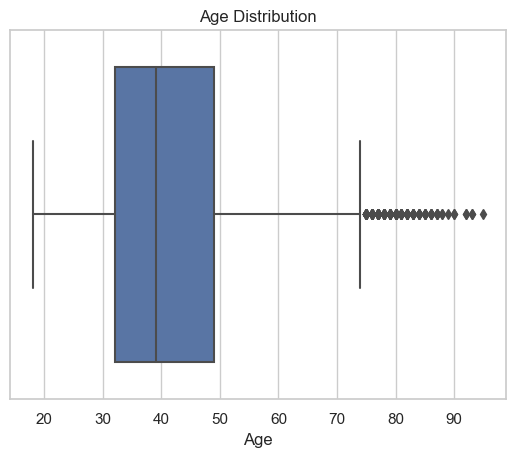

count    11162.000000
mean        41.231948
std         11.913369
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64


In [553]:
sns.set_style('whitegrid')

ax = sns.boxplot(x=df['age'])

ax.set_title('Age Distribution')
ax.set_xlabel('Age')

plt.show()
print(df['age'].describe())

As we can see, the mean age of the costumers is 41 years old, and the standard deviation is 11 years old.

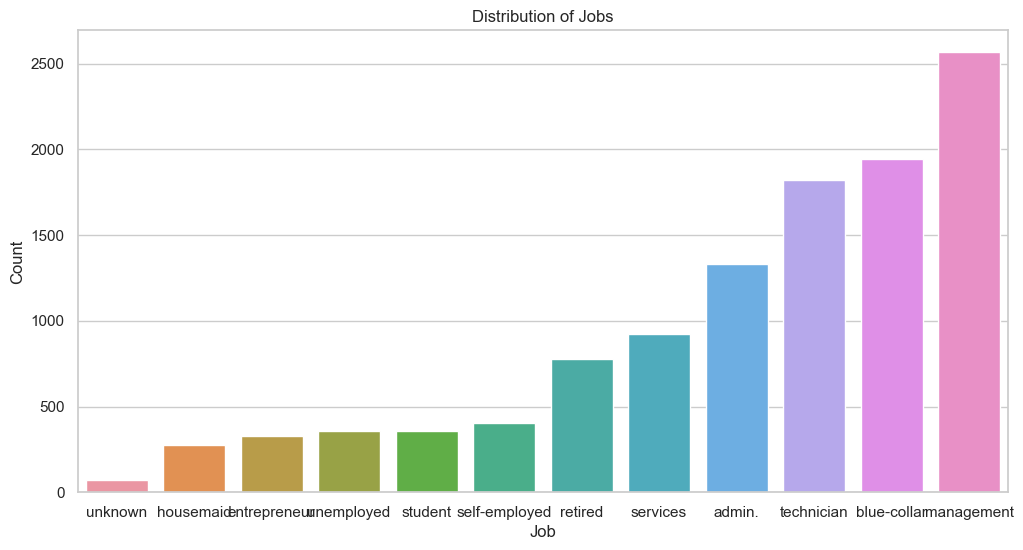

              Job  Value Counts
0      management          2566
1     blue-collar          1944
2      technician          1823
3          admin.          1334
4        services           923
5         retired           778
6   self-employed           405
7         student           360
8      unemployed           357
9    entrepreneur           328
10      housemaid           274
11        unknown            70


In [554]:
job_counts = df['job'].value_counts().sort_values()
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x=df['job'], order=job_counts.index, ax=ax)
ax.set_title('Distribution of Jobs')
ax.set_xlabel('Job')
ax.set_ylabel('Count')
plt.show()

job_counts = df['job'].value_counts().reset_index()
job_counts.columns = ['Job', 'Value Counts']
job_counts = job_counts.sort_values(by=['Value Counts'], ascending=False)
print(job_counts)


As we can see here, the most job categories with the highest number of people are Management and Blue-collar.

<Axes: xlabel='education', ylabel='count'>

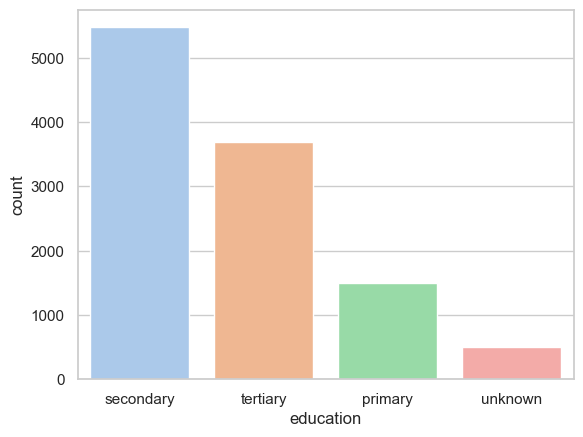

In [555]:
# Plot the counts of education
sns.countplot(data=df, x='education')


The are more clients with secondary education than teriary education.

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

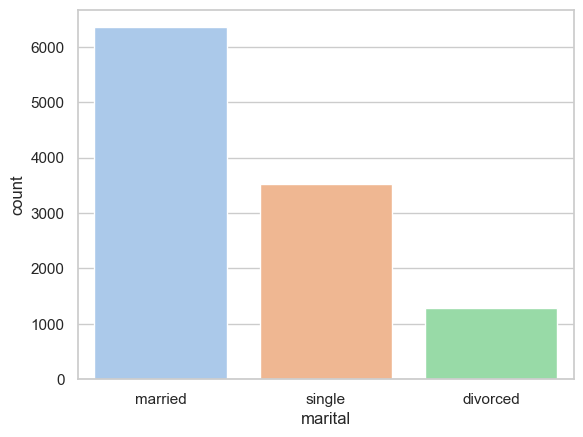

In [556]:
# Counts of marital status categories
sns.countplot(data=df, x='marital')
  

df['marital'].value_counts()

as we can see here, most of the clients are married, the second large group of clients are single.

<Axes: xlabel='housing', ylabel='count'>

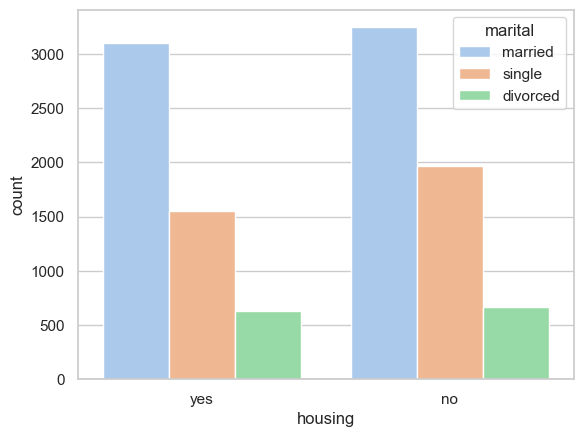

In [557]:
# Plot the counts of housing divided by marital status.
sns.countplot(data=df, x='housing', hue='marital')


Now, we are exploring the clients of the bank, we 've made a graphic that shows wich group (single, married and divorce) posses a housing loan.
According to the following graphic description the largest group is the married gruup and the smallest group is the divorced people.

<Axes: xlabel='loan', ylabel='count'>

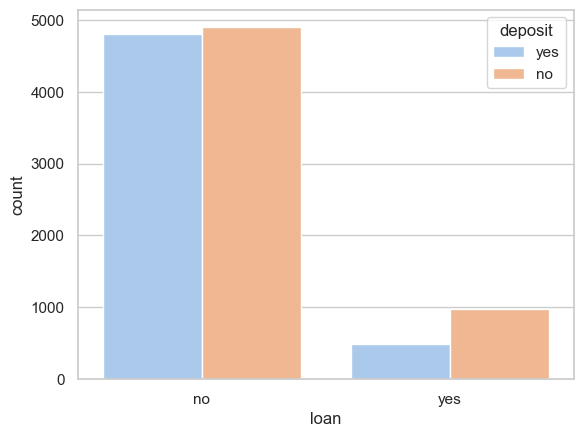

In [558]:
# Plot the counts of loan
sns.countplot(data=df, x='loan', hue='deposit')


As we can see here, the number of clients that have made a deposit without a loan is relatively big compared to the number of clients that have made a deposit with a loan in the bank, this information tells us wich clients we need to aim for.

<Axes: xlabel='deposit', ylabel='previous'>

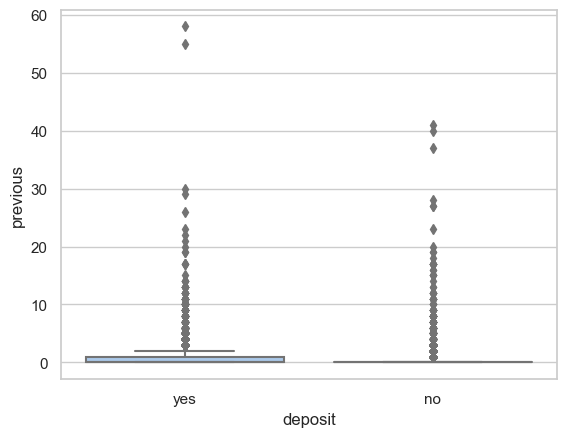

In [559]:
# Create a boxplot of previous by deposit status
sns.boxplot(data=df, x='deposit', y='previous')


In this graphic we try to understand if the clients who the bank've contacted previously have been made a deposit, as we can see, the group is relatively big as the number of outliers. 

deposit,no,yes
poutcome,,
failure,0.50,0.50
other,0.43,0.57
success,0.09,0.91
unknown,0.59,0.41


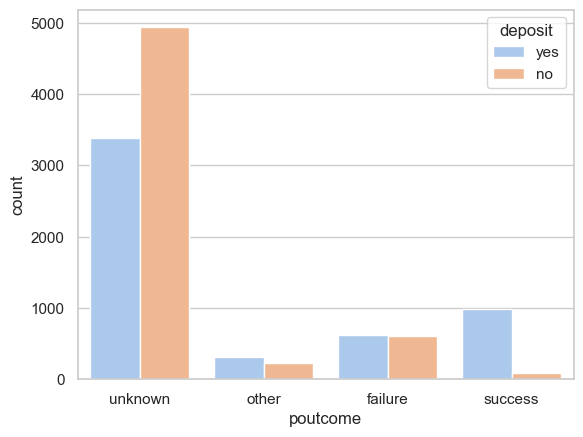

In [560]:
# Plot the counts of poutcome for the current campaign
sns.countplot(data=df, x='poutcome', hue='deposit')

# Cross-tabulate poutcome and deposit to calculate the success rate for each previous outcome
pd.crosstab(df['poutcome'], df['deposit'], normalize='index').round(2)



We've made a graphic and a dataframe tha shows the success of the prevouse campaing, the client who had suscribed in the previous campaing are more likely to deposit in the next campaing, however the clients who are registrated by "other" are more likely to deposit in the next campaing.

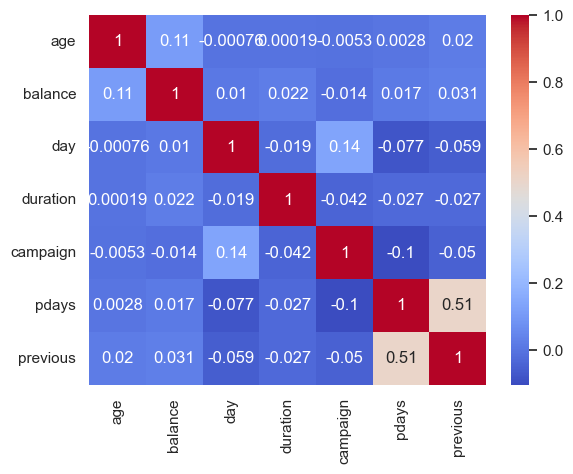

In [561]:
# Now we'll select only the numerical columns and create a correlation matrix for numerical columns

numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
numerical_corr = df[numerical_cols].corr()
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm')
plt.show()

We've made a correlation matrix between the numerical columns, as we can see the balance and age have a correlation (0.11) the same as the balance and previos (0.031). previos and pdays have a strong correlation (0.51).

## Stadistical Analysis

In [562]:
# Calculate descriptive statistics
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
desc_stats = df[num_cols].describe()
desc_stats

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


We performed a descriptive stadistic from the most significant variables.

* From this we can see that the dataset contains information on 11162 clients of the bank.
* The average age of the clients is around 41 years.
* the average balance of the clients is 1528.5 with a standard deviation of 3225

In [563]:
# t-test
loan_yes = df[df['loan'] == 'yes']['balance']
loan_no = df[df['loan'] == 'no']['balance']
t_stat, p_value = stats.ttest_ind(loan_yes, loan_no, equal_var=False)

# Print results
print("T-statistic: {:.2f}".format(t_stat))
print("p-value: {:.4f}".format(p_value))


T-statistic: -11.91
p-value: 0.0000


**Ingsights:**

We've made a T-test between two groups of bank customers based on whether they have a personal loan or not.

The negative t-statistic indicates that the mean balance of those with loan is significantly lower than those without a loan.

The P-value is low and indicates that the difference in means between the two groups of bank customers is unlikely to be due to chance

## 3. Feature Engineering: 


In [564]:
# we perform the one-hot encoding to convert categorical variables into numeric, after converting those variables to numeric we fit the model to a logistic regression.
# One-hot encode categorical variables
X = pd.get_dummies(df.drop(['deposit'], axis=1))
# Convert target variable to binary
y = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)
# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)

# Print coefficients
coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': logreg.coef_[0]})
print(coef_df)


                feature  coefficient
0                   age    -0.012261
1               balance     0.000024
2                   day     0.007646
3              duration     0.003852
4              campaign    -0.222064
5                 pdays    -0.000644
6              previous     0.189462
7            job_admin.    -0.009691
8       job_blue-collar    -0.191774
9      job_entrepreneur    -0.022918
10        job_housemaid    -0.006509
11       job_management     0.020018
12          job_retired     0.128265
13    job_self-employed    -0.015189
14         job_services    -0.066554
15          job_student     0.051823
16       job_technician    -0.032450
17       job_unemployed     0.007269
18          job_unknown     0.001450
19     marital_divorced     0.005930
20      marital_married    -0.152505
21       marital_single     0.010314
22    education_primary    -0.076193
23  education_secondary    -0.170108
24   education_tertiary     0.093478
25    education_unknown     0.016563
2

**F.E One-hote encoding Insights:**

This is coefficients of the logistic regression model that was fit using all the variables in the data set except for the target variable deposit. The logistic regression model predicts the probability that the target variable is 1 (i.e., the customer makes a deposit), given the values of the input features. A positive coefficient for a feature indicates that an increase in the value of that feature is associated with an increased probability of the customer making a deposit, while a negative coefficient indicates that an increase in the value of that feature is associated with a decreased probability of the customer making a deposit.

For example, we can see that the coefficient for balance is positive, which suggests that customers with higher account balances are more likely to make a deposit. Conversely, the coefficient for campaign is negative, which suggests that customers who have been contacted by the bank more times are less likely to make a deposit.

In [565]:

# Define the age bins
age_bins = [0, 20, 30, 40, 50, 60, 80]

# Define the bin labels
age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']

# Create a new column 'age_group' using pandas cut function
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Print the first 5 rows to verify the new column
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,50-60
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,50-60
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,40-50
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,50-60
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,50-60


<Axes: xlabel='age_group', ylabel='count'>

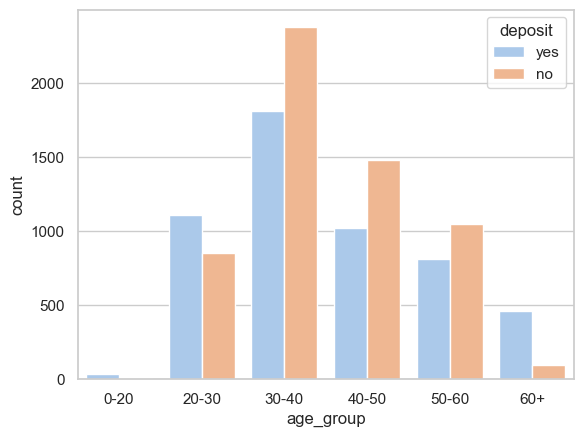

In [566]:
sns.countplot(data=df, x='age_group', hue='deposit')


We've performed a feature selection called Binning, wich transform continuous numerical values into categorical features, then we've a graphic that represents the age group, as we can see here the more active clients are between the 20 and 60 years old.

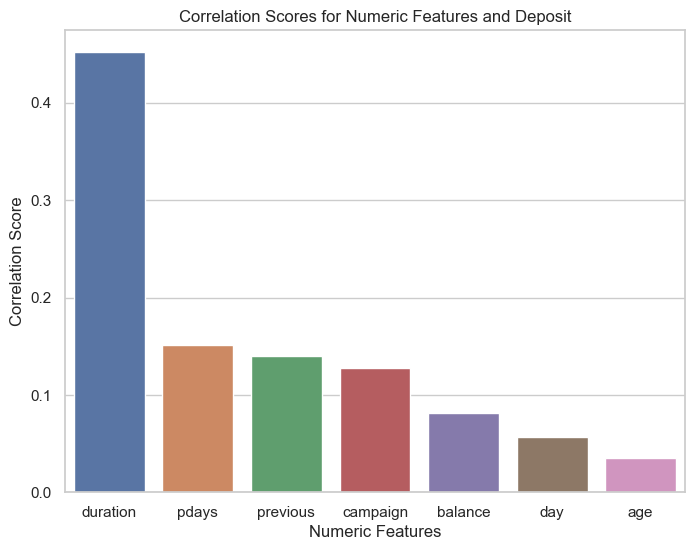

In [567]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['deposit_encoded'] = le.fit_transform(df['deposit'])

num_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

corr_scores = []
for feature in num_features:
    corr_score = abs(df[feature].corr(df['deposit_encoded']))
    corr_scores.append((feature, corr_score))


corr_scores = sorted(corr_scores, key=lambda x: x[1], reverse=True)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=[score[0] for score in corr_scores], y=[score[1] for score in corr_scores])
ax.set_xlabel('Numeric Features')
ax.set_ylabel('Correlation Score')
ax.set_title('Correlation Scores for Numeric Features and Deposit')
plt.show()



We have performed a feature selection on the numeric features, and based on the correlation betwen the numerical features and the target variable "deposit", the stronger variables are:
* Duration
* pdays
* previous
* campaign
* balance

## 4. Machine Learning Models

### 4.1: Logistic Regression

In [568]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#create a logistic regression model and fit it to the data.
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

score = logreg.score(X_test,y_test)
print(score)

0.7832512315270936


In [569]:
from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1166
           1       0.78      0.76      0.77      1067

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



*Logistic Regression results:*

We've performed a logistic regression model and the model correctly predicted the deposit (yes or no) for 78%

**Setting up Hyperparameters**

In [570]:
from sklearn.model_selection import cross_val_score
# We perform another logistic regresion trying to u¡improve the las one. 
# We modify the Inverse regularization strenght (C)

# Defining a list of candidates for C
c_val = [0.001, 0.01, 0.1, 1, 10, 100]

scores = []

for C in c_val:
    log_reg = LogisticRegression(C=C)
    cv_score = cross_val_score(log_reg, X, y, cv=5, scoring='f1')
    scores.append(np.mean(cv_score))

# Get the best index of the best score    
BestIndex = np.argmax(scores)

Best_C = c_val[BestIndex]

print(f'Best C: ',Best_C)

Best C:  0.1


In [571]:
#create a logistic regression model and set the C value to 0.1

log_reg = LogisticRegression(C=0.1)
log_reg.fit(X_train, y_train)

score = logreg.score(X_test,y_test)
print(f'Accuracy: ',score)

Accuracy:  0.7832512315270936


In [572]:
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1166
           1       0.78      0.76      0.77      1067

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



We've set the C parameter to 0.1 and our model performs as the first one, let's see the metrics

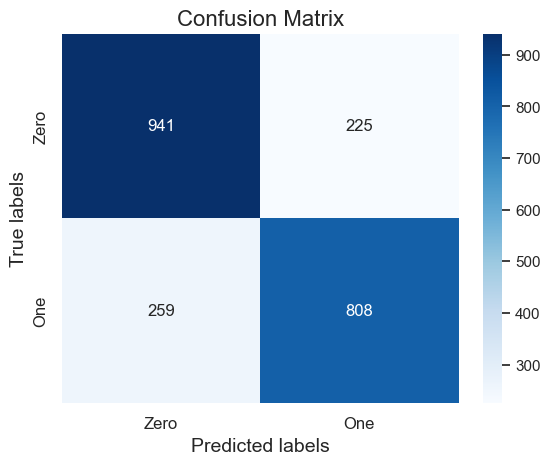

In [573]:
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Define labels for the plot
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

# Create a function to plot the confusion matrix
def plot_confusion_matrix(cm):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
    
    ax.set_xlabel('Predicted labels', fontsize=14)
    ax.set_ylabel('True labels', fontsize=14)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_yticklabels(categories, fontsize=12)
    ax.set_title('Confusion Matrix', fontsize=16)

# Call the function to plot the confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred))
plt.show()


**Insights of Logistic regression**

As we see here, our presicion for both 0 and 1 are 78%, but the recall is pretty low in 1 (76%) compared with 0 (81%).
in the other hand, our f1-score is 0.8 and 0.77 for both cases.

### 4.2 Desicion Tree Classifier

In [574]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier class
tree_model = DecisionTreeClassifier()

# Fit the model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = tree_model.predict(X_test)

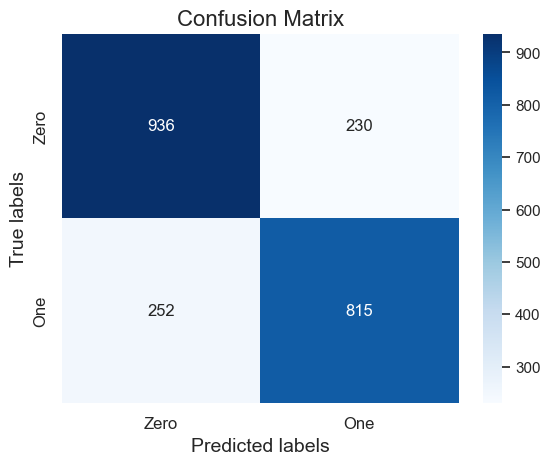

In [575]:
# Let's make a prediction and then see how its behaive with cofusion matrix.
y_pred = tree_model.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

# Create a function to plot
def plot_confusion_matrix(cm):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
    
    ax.set_xlabel('Predicted labels', fontsize=14)
    ax.set_ylabel('True labels', fontsize=14)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_yticklabels(categories, fontsize=12)
    ax.set_title('Confusion Matrix', fontsize=16)

plot_confusion_matrix(confusion_matrix(y_test, y_pred))
plt.show()

In [576]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

Accuracy: 0.784
Precision: 0.780
Recall: 0.764
F1 score: 0.772


** DESICION TREE CLASSIFIER INSIGHTS:** 

As we can see, with the desicion tree model, the metrics are slightly similar to the logistic regression except for the f1 score and precision. these metrics tell us that the desicion tree model is no a quite good fit.

### 4.3: Random Forest Classifier:

In [577]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)


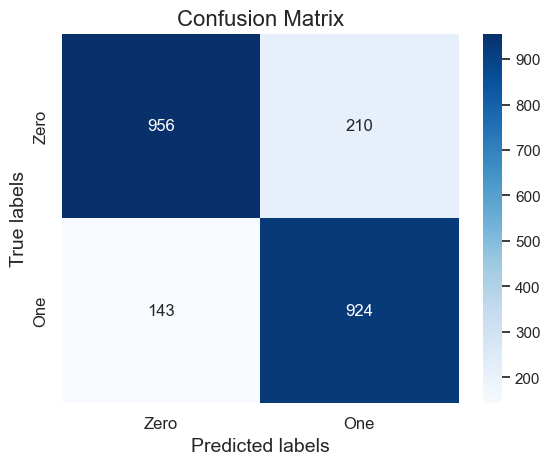

In [578]:
y_pred = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

# Create a function to plot
def plot_confusion_matrix(cm):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
    
    ax.set_xlabel('Predicted labels', fontsize=14)
    ax.set_ylabel('True labels', fontsize=14)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_yticklabels(categories, fontsize=12)
    ax.set_title('Confusion Matrix', fontsize=16)

plot_confusion_matrix(confusion_matrix(y_test, y_pred))
plt.show()

In [579]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

Accuracy: 0.842
Precision: 0.815
Recall: 0.866
F1 score: 0.840


We've perdormed a random forest model and the model seems to perform better than the other ones. all the metrics are higher than logistic regression and desicion tree metrics. 

We have performed three different models and the best one is random forest, but now we have to test the model with a different test set.

## 5. Testing our models with real Data

### 5.1: Load the data and prepare it.

To test correctly our model, we need to test it with outside data. 

We have a train and test datasets to train a model and test it as well. 

In [640]:
# Load the train and test data.
train = pd.read_csv('train.csv', sep=';')
test= pd.read_csv('test.csv', sep=';')

In [641]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [642]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [643]:
# We repeat all the steps to convert categorical columns to numerical and convert the yes (1) and no (0) from the y (deposit).

# Select the categorical columns of the train set
categ_col = ['job', 'marital', 'education', 'default', 'housing', 'loan',
            'contact', 'month', 'poutcome']
# convert categorical columns to one-hot-encoded columns
train = pd.get_dummies(train, columns=categ_col)
train['y'].apply(lambda x: 1 if x == 'yes' else 0)


0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [644]:
# Select the categorical columns of the test set

categ_col = ['job', 'marital', 'education', 'default', 'housing', 'loan',
            'contact', 'month', 'poutcome']

# convert categorical columns to one-hot-encoded columns
test = pd.get_dummies(test, columns=categ_col)
test['y'].apply(lambda x: 1 if x == 'yes' else 0)

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [645]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   balance              45211 non-null  int64 
 2   day                  45211 non-null  int64 
 3   duration             45211 non-null  int64 
 4   campaign             45211 non-null  int64 
 5   pdays                45211 non-null  int64 
 6   previous             45211 non-null  int64 
 7   y                    45211 non-null  object
 8   job_admin.           45211 non-null  bool  
 9   job_blue-collar      45211 non-null  bool  
 10  job_entrepreneur     45211 non-null  bool  
 11  job_housemaid        45211 non-null  bool  
 12  job_management       45211 non-null  bool  
 13  job_retired          45211 non-null  bool  
 14  job_self-employed    45211 non-null  bool  
 15  job_services         45211 non-null  bool  
 16  job_

In [646]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  4521 non-null   int64 
 1   balance              4521 non-null   int64 
 2   day                  4521 non-null   int64 
 3   duration             4521 non-null   int64 
 4   campaign             4521 non-null   int64 
 5   pdays                4521 non-null   int64 
 6   previous             4521 non-null   int64 
 7   y                    4521 non-null   object
 8   job_admin.           4521 non-null   bool  
 9   job_blue-collar      4521 non-null   bool  
 10  job_entrepreneur     4521 non-null   bool  
 11  job_housemaid        4521 non-null   bool  
 12  job_management       4521 non-null   bool  
 13  job_retired          4521 non-null   bool  
 14  job_self-employed    4521 non-null   bool  
 15  job_services         4521 non-null   bool  
 16  job_st

Now, we split the datasets in train and test variables.

In [647]:
X_train_new = train.drop('y', axis=1)
y_train_new = train['y']

In [648]:
X_test_new = test.drop('y', axis=1)
y_test_new = test['y']

### 5.2 Logistic Regression Model

In [649]:
# Now we perform a logistic regression model.
logreg = LogisticRegression()
logreg.fit(X_train_new, y_train_new)
lr_pred = logreg.predict(X_test_new)

score = logreg.score(X_test_new,y_test_new)
print(f'Accuracy: ',score)


Accuracy:  0.8900685689006856


In [650]:
# Cross-Validation

# Perform 10-fold cross validation
scores = cross_val_score(logreg, X, y, cv=10)

# Print the mean and standard deviation of the accuracy scores
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.772 (+/- 0.059)


In [651]:
print(classification_report(y_test_new, lr_pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94      4000
         yes       0.56      0.20      0.30       521

    accuracy                           0.89      4521
   macro avg       0.73      0.59      0.62      4521
weighted avg       0.86      0.89      0.87      4521



In [652]:
# We perform another logistic regresion trying to u¡improve the las one. 
# We modify the Inverse regularization strenght (C)

# Defining a list of candidates for C
c_val = [0.001, 0.01, 0.1, 1, 10, 100]

scores = []

for C in c_val:
    logreg = LogisticRegression(C=C)
    cv_score = cross_val_score(logreg, X, y, cv=5, scoring='f1')
    scores.append(np.mean(cv_score))

# Get the best index of the best score    
BestIndex = np.argmax(scores)

Best_C = c_val[BestIndex]

print(f'Best C: ',Best_C)

Best C:  0.1


In [653]:
# Now we perform a logistic regression model.
logreg = LogisticRegression(C=0.1)
logreg.fit(X_train_new, y_train_new)
lr_pred = logreg.predict(X_test_new)

score = logreg.score(X_test_new,y_test_new)
print(f'Accuracy: ',score)

Accuracy:  0.88940499889405


In [654]:
print(classification_report(y_test_new, lr_pred))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      4000
         yes       0.55      0.21      0.31       521

    accuracy                           0.89      4521
   macro avg       0.73      0.60      0.62      4521
weighted avg       0.86      0.89      0.87      4521



We also tried to modify the logreg hyperparams seeking for improvments, not getting better results.

We've performed a logistic regresion model and these are the results:

For the class "no" (no subscription), the model has a precision of 0.90, recall of 0.98, and F1-score of 0.94. This means that when the model predicts "no", it is correct 90% of the time, and out of all the actual "no" cases, the model is able to correctly identify 98% of them.

For the class "yes" (subscription), the model has a precision of 0.56, recall of 0.20, and F1-score of 0.30. This means that when the model predicts "yes", it is correct 56% of the time, and out of all the actual "yes" cases, the model is able to correctly identify only 20% of them.

The macro-average F1-score is 0.62, which is the average of the F1-scores for both classes. The weighted-average F1-score is 0.87, which takes into account the number of instances for each class.

Overall, it seems that the logistic regression model performs better for predicting the "no" class (no subscription) than the "yes" class (subscription), based on the precision, recall, and F1-score for each class.

### 5.2: Desicion Tree Classifier

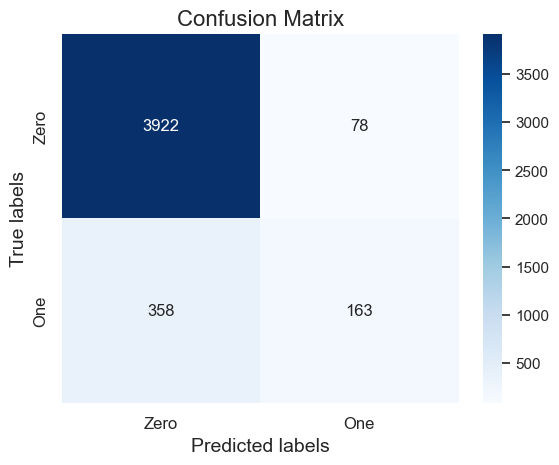

In [657]:
tree_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)   
tree_model.fit(X_train_new, y_train_new)
pred = tree_model.predict(X_test_new)

cm_dt = confusion_matrix(y_test_new,pred)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

# Create a function to plot
def plot_confusion_matrix(cm):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
    
    ax.set_xlabel('Predicted labels', fontsize=14)
    ax.set_ylabel('True labels', fontsize=14)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_yticklabels(categories, fontsize=12)
    ax.set_title('Confusion Matrix', fontsize=16)

plot_confusion_matrix(confusion_matrix(y_test_new, pred))
plt.show()

In [658]:
accuracy = accuracy_score(y_test_new, pred)
precision = precision_score(y_test_new, pred, pos_label='yes')
recall = recall_score(y_test_new, pred, pos_label='yes')
f1 = f1_score(y_test_new, pred, pos_label='yes')

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

Accuracy: 0.904
Precision: 0.676
Recall: 0.313
F1 score: 0.428


In [659]:
dtc_oversize = DecisionTreeClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(dtc_oversize, X, y, scoring='accuracy', cv=kfold)

print('Accuracy: {:.3f} (+ / - {:.3f})'.format(score.mean(), score.std()))

Accuracy: 0.786 (+ / - 0.008)


### 5.4 Random Forest Classifier.

In [663]:
# Initialize the Random Forest model with 100 trees
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train_new, y_train_new)

# Make predictions on the test data
rf_pred = rf.predict(X_test_new)

print(classification_report(y_test_new, rf_pred))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      4000
         yes       1.00      1.00      1.00       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521



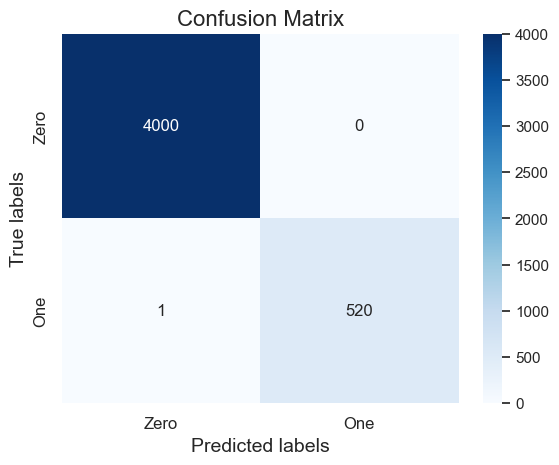

In [664]:
m_rf = confusion_matrix(y_test_new, y_pred)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

plot_confusion_matrix(confusion_matrix(y_test_new, rf_pred))
plt.show()

In [665]:
accuracy = accuracy_score(y_test_new, y_pred)
precision = precision_score(y_test_new, y_pred, pos_label='yes')
recall = recall_score(y_test_new, y_pred, pos_label='yes')
f1 = f1_score(y_test_new, y_pred, pos_label='yes')

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 score: 1.000


In [666]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(rf, X, y, scoring='accuracy', cv=kfold)

print('Accuracy: {:.3f} (+ / - {:.3f})'.format(score.mean(), score.std()))

Accuracy: 0.852 (+ / - 0.010)


In [667]:
# Initialize the Random Forest model with 100 trees
rf = RandomForestClassifier(n_estimators=3
                            , random_state=42)

# Fit the model on the training data
rf.fit(X_train_new, y_train_new)

# Make predictions on the test data
y_pred = rf.predict(X_test_new)

print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

          no       0.99      0.99      0.99      4000
         yes       0.92      0.91      0.91       521

    accuracy                           0.98      4521
   macro avg       0.96      0.95      0.95      4521
weighted avg       0.98      0.98      0.98      4521



Our model might be overfitting, lets analyse the hiperparams

In [689]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 7, 9, 12],
    'min_samples_leaf': [1, 2, 4, 5, 6],
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestClassifier(random_state=42)

grid_cv = GridSearchCV(rf, param_grid, scoring='f1', cv=5, n_jobs=-1)

grid_cv.fit(X_train_new, y_train_new)

print("Best hyperparameters:", grid_cv.best_params_)



/Users/natanael/Desktop/Bank_project-Coderhouse/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/natanael/Desktop/Bank_project-Coderhouse/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/natanael/Desktop/Bank_project-Coderhouse/.venv/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/natanael/Desktop/Bank_project-Coderhouse/.venv/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/natanael/Desktop/Bank_project-Coderhouse/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_s

KeyboardInterrupt: 

In [687]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_new, y_train_new)


In [686]:
 #Initialize the Random Forest model with 100 trees
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=3,
                            max_features='sqrt',
                            min_samples_leaf=1,
                            min_samples_split=2, 
                            random_state=42)

# Fit the model on the training data
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = rf.predict(X_test_new)

print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94      4000
         yes       0.50      0.01      0.01       521

    accuracy                           0.88      4521
   macro avg       0.69      0.50      0.48      4521
weighted avg       0.84      0.88      0.83      4521

